# Import Libraries

In [ ]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [ ]:
##### Other Libraries #####

## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## To visualize decision tree ##
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

# Load the Datset and analyse

In [ ]:
Headlines=pd.read_csv("FinancialData.csv",
                      names = ['lables','messages'],encoding='ISO-8859-1')
Headlines.shape

(4846, 2)

In [ ]:
Headlines.head()

,lables,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
Headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lables    4846 non-null   object
 1   messages  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
Headlines.isnull().sum()

lables      0
messages    0
dtype: int64

No missing values

# Introducing new column 'target'

In [ ]:
News_copy=Headlines.copy()
News_copy.shape

(4846, 2)

In [ ]:
def func(df_new):
    if df_new == 'neutral':
        return 0
    elif df_new == 'negative':
        return 1
    else:
        return 2


In [ ]:
News_copy['target'] = News_copy.lables.apply(func)
News_copy.head()

,lables,messages,target
0,neutral,"According to Gran , the company has no plans t...",0
1,neutral,Technopolis plans to develop in stages an area...,0
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


# Visualization

In [ ]:
Headlines.lables.value_counts()

neutral     2879
positive    1363
negative     604
Name: lables, dtype: int64

Text(0.5, 1.0, 'Percentages of different lables to the headlines')

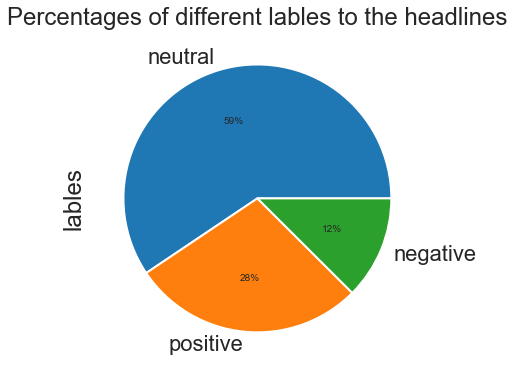

In [ ]:
plt.figure(figsize=(6,7))

Headlines.lables.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Percentages of different lables to the headlines")

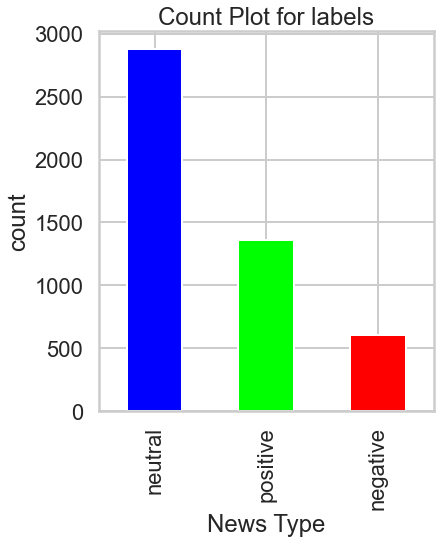

In [ ]:
# Count plot for labels feature
plt.figure(figsize=(6,7))
Headlines.lables.value_counts().plot(kind='bar',color=['blue','lime','red'])
plt.xlabel("News Type")
plt.ylabel("count")
plt.title("Count Plot for labels");

# Data PreProcessing

In [ ]:
#nltk
import nltk
# nltk.download()

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import re

In [ ]:
# Text preprocessing
corpous = list()

#Object for porterstem
ps = PorterStemmer()

for i in range(len(News_copy)):
        # remove all single characters

    text = re.sub(r'[^a-zA-Z]',' ',News_copy.messages[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpous.append(text)

In [ ]:
corpous

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [ ]:
Headlines['messages']

0       According to Gran , the company has no plans t...
1       Technopolis plans to develop in stages an area...
2       The international electronic industry company ...
3       With the new production plant the company woul...
4       According to the company 's updated strategy f...
                              ...                        
4841    LONDON MarketWatch -- Share prices ended lower...
4842    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843    Operating profit fell to EUR 35.4 mn from EUR ...
4844    Net sales of the Paper segment decreased to EU...
4845    Sales in Finland decreased by 10.5 % in Januar...
Name: messages, Length: 4846, dtype: object

# Model Building---Converting into Vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpous).toarray()

In [ ]:
# Dependent Feature
y = News_copy.target

In [ ]:
X.shape, y.shape

((4846, 5000), (4846,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
X_train.shape ,X_test.shape, y_train.shape  , y_test.shape

((3876, 5000), (970, 5000), (3876,), (970,))

In [ ]:
y_train

3832    0
1258    0
2644    1
3817    0
1280    0
       ..
307     2
2064    2
2325    0
2303    2
3392    0
Name: target, Length: 3876, dtype: int64

In [ ]:
cv.get_feature_names()[:10]

['ab',
 'ab sto',
 'abb',
 'abl',
 'abp',
 'abp hel',
 'abroad',
 'ac',
 'ac drive',
 'ac million']

In [ ]:
# Scikit-learn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Build Models

models = {
    MultinomialNB():'Multinomial Naive Bayes',
    LogisticRegression(max_iter=300):'Logistic Regression',
    SVC(C=1.0, kernel='linear', degree=3, gamma='auto'):"Support Vector Machine",
    DecisionTreeClassifier(): "DecisionTreeClassifier"
}
for m in models.keys():
    m.fit(X_train,y_train)

In [ ]:
# Check Accuracy for each model
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Multinomial Naive Bayes is :  69.38144329896907 %
Accuracy Score for Logistic Regression is :  75.87628865979381 %
Accuracy Score for Support Vector Machine is :  71.75257731958763 %
Accuracy Score for DecisionTreeClassifier is :  68.14432989690722 %


So the high accuracy model is from Logistic Regression, so lets build and save the model using Logistic Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()


model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pd.DataFrame(confusion_matrix(y_test,pred),columns=["Predicted_neutral", "Predicted_negative","Predicted_positive"],
            index=["Actual_neutral", "Actual_negative","Actual_positive"])

,Predicted_neutral,Predicted_negative,Predicted_positive
Actual_neutral,525,12,46
Actual_negative,38,64,15
Actual_positive,114,9,147


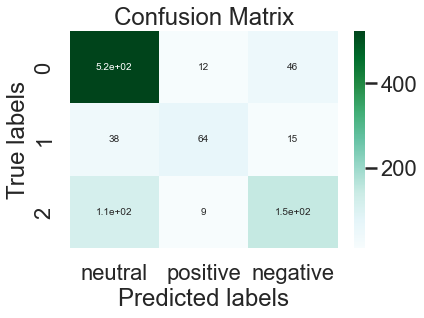

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["neutral", "positive", "negative"]);

# Saving the model to pickle file

In [ ]:
import pickle
pickle.dump(model,open('Sentiment model.pkl','wb'))